# 머신러닝 흐름

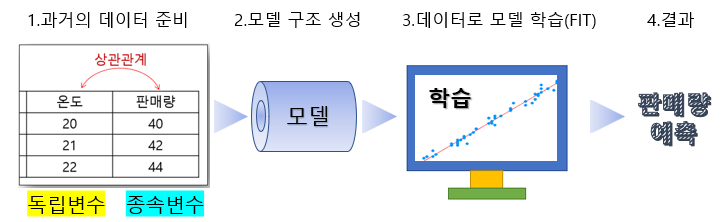  

### 필요한 실습 자료 
> 레모네이드( [다운로드](https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/lemonade.csv) )(URL) https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/lemonade.csv  
> ■사용방법  
> <font color=blue>레모네이드 = pd.read_csv(URL)</font>  
> <font color=blue>독립 = 레모네이드[['온도']]</font>  
> <font color=blue>종속 = 레모네이드[['판매량']]</font>  
> 

In [18]:
## 관련 라이브러리 추가
import tensorflow as tf      # 머신러닝: tensorflow
import pandas as pd          # 데이터: Pandas                  

In [19]:
##1. 과거의 데이터 준비
레모네이드 = pd.read_csv("https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/lemonade.csv")  
독립 = 레모네이드[['온도']]
종속 = 레모네이드[['판매량']]
print('독립변수:',독립.shape, '종속변수:',종속.shape)

독립변수: (6, 1) 종속변수: (6, 1)


## 모델 구조

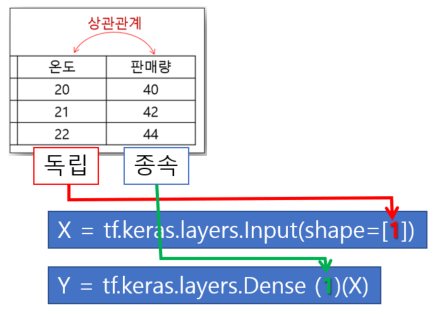&nbsp;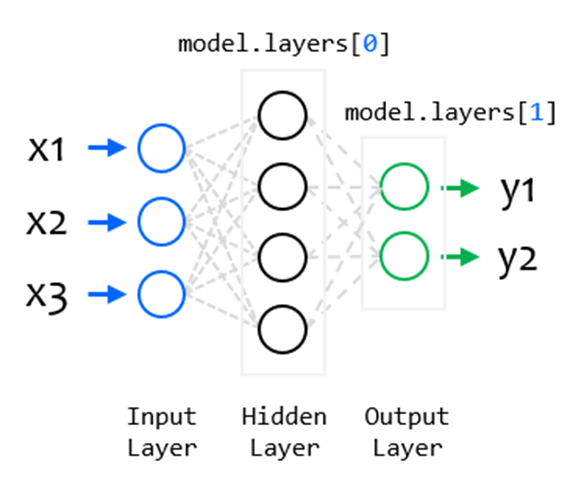  

In [20]:
##2. 모델 구조 생성
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')           # mse, mean square error    

In [27]:
##3. 데이터로 모델 학습(fit)
model.fit(독립, 종속, epochs=2000, verbose=False)   # verbose=False 옵션은 내용보기 안함    
model.fit(독립, 종속, epochs=10)                    # default는 내용보기 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0066
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0066
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0066
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0066


In [40]:
##4. 모델을 이용하여 예측
##DataFrame 생성하여 테스트
테스트 = pd.DataFrame({'온도':[18,18.2,19.3,19.6]})
print("온도에 따른 판매량 예측:\n",model.predict(테스트))      

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
온도에 따른 판매량 예측:
 [[36.22638 ]
 [36.6171  ]
 [38.766045]
 [39.352123]]


In [41]:
테스트

,온도
0,18.0
1,18.2
2,19.3
3,19.6


In [43]:
## 정보확인 : 가중치
print(model.get_weights())                                                     

[array([[1.9535887]], dtype=float32), array([1.0617827], dtype=float32)]


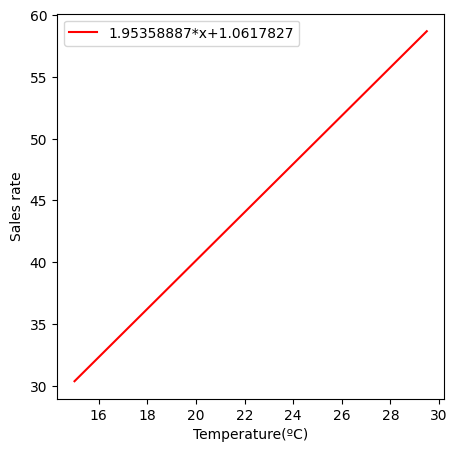

In [53]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#데이터
temp=np.arange(15.0, 30.0, 0.5, dtype=np.float64)
sales=1.95358887*temp+1.0617827 
#그래프
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('Temperature(ºC)')
ax.set_ylabel('Sales rate')
ax.plot(temp,sales, color='red', label=f'1.95358887*x+1.0617827') 
ax.legend()
plt.show()

## 복습
데이터 수집  > 데이터 전처리 / train_test_split > 모델 구축 / 학습 > 모델 평가 > 예측  
* 매번 보는 쪽지시험과 기말고사간의 인과관계를 예측
* 데이터 수집: scores_data.csv 

In [4]:
import tensorflow as tf
import pandas as pd
# 1.데이터 수집
df = pd.read_csv('scores_data.csv')
df

,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk
5,0.9,40,7.6,bus
6,1.9,23,4.3,walk
7,3.5,37,4.2,bicycle
8,4.0,39,4.7,bicycle
9,5.4,55,7.5,walk


In [7]:
# 2. 데이터 전처리 및 train_test_split     
쪽지시험 = df['quiz'] 
기말시험 = df['final_test'] 

In [9]:
# 3-1. 모델 구축 
X = tf.keras.layers.Input(shape=[1])
Y = tf.keras.layers.Dense(1)(X)
model  = tf.keras.models.Model(X,Y)
model.compile(loss='mse') # mean square error

# 3-2. 학습
model.fit(쪽지시험, 기말시험, epochs=10000, verbose=False)                     
model.fit(쪽지시험, 기말시험, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 184.5474
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 184.5121
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 184.4768
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 184.4416
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 184.4065
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 184.3714
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 184.3363
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 184.3013
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 184.2664
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 184.2315


In [10]:
# 4. 테스트
테스트 = pd.DataFrame({'quiz':[5.7, 3.5,9.0]})
print("쪽지시험에 따른 기말시험 점수:\n",model.predict(테스트))   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
쪽지시험에 따른 기말시험 점수:
 [[58.8181  ]
 [39.976017]
 [87.08123 ]]


In [11]:
# 5. 정보확인
print(model.get_weights())                                                  

[array([[8.564585]], dtype=float32), array([9.99997], dtype=float32)]


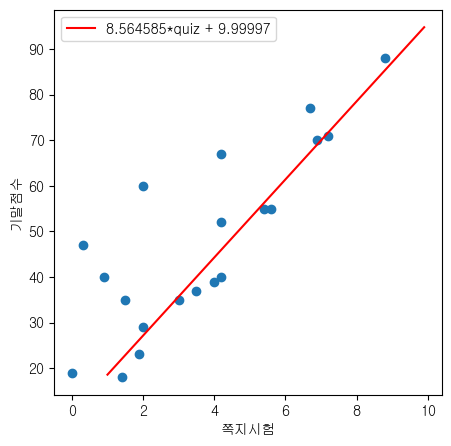

In [60]:
# 6. 시각화
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#한글폰트
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['axes.unicode_minus'] =False

quiz = np.arange(1.0,10.0,0.1, dtype=np.float64)
final = 8.564585*quiz + 9.99997
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('쪽지시험')
ax.set_ylabel('기말점수')
ax.plot(quiz,final, color='red', label=f'8.564585*quiz + 9.99997')              
ax.legend()
ax.scatter(쪽지시험,기말시험)
plt.show()

In [58]:
# Visual Python: Visualization > Chart Style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(5, 5))

from matplotlib import rcParams
rcParams['font.family'] = 'Batang'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

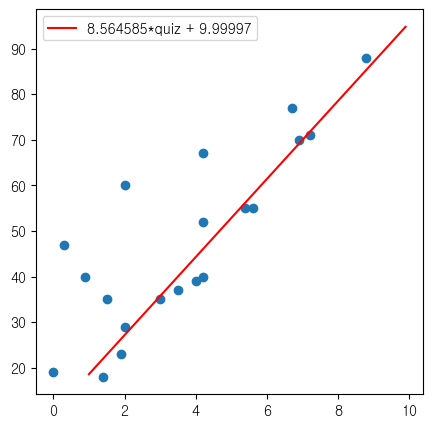

In [61]:
# Visual Python: Visualization > Matplotlib
plt.plot(quiz, final, color='red',label='8.564585*quiz + 9.99997')
plt.legend()
plt.scatter(쪽지시험,기말시험)
plt.show()